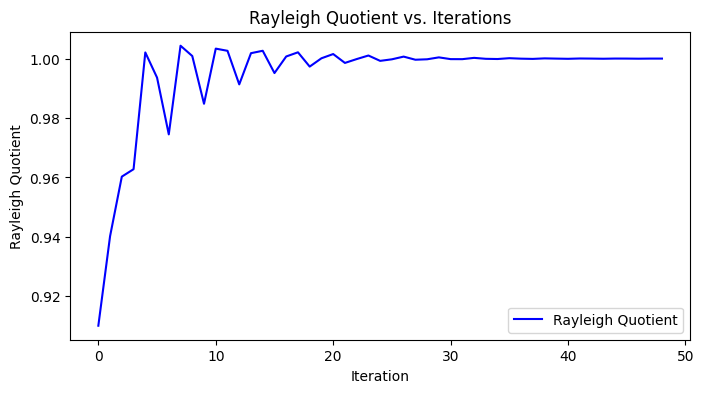

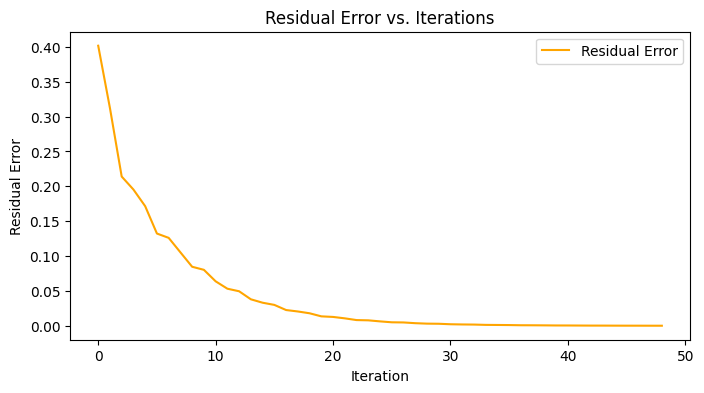

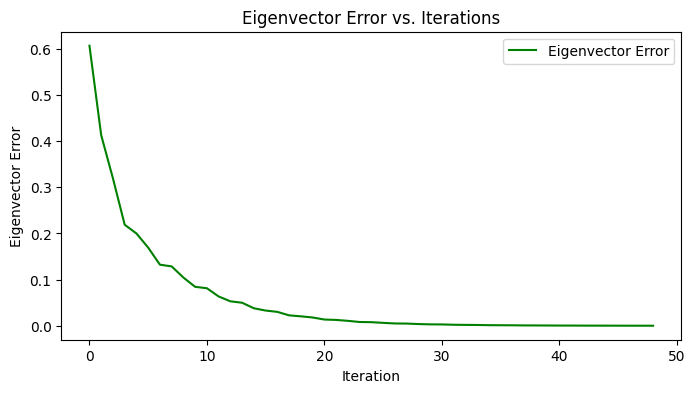

Eigenvalue (lambda): [[1.00001016]]
Eigenvector v: [[0.24700772]
 [0.35686874]
 [0.2470348 ]
 [0.        ]
 [0.        ]
 [0.27446155]
 [0.13726358]
 [0.54896236]
 [0.46662292]
 [0.37059227]]
iteration:  49
Converged eigenvalue of v[k]:
Page rank of Node 0: [0.24700772]
Page rank of Node 1: [0.35686874]
Page rank of Node 2: [0.2470348]
Page rank of Node 3: [0.]
Page rank of Node 4: [0.]
Page rank of Node 5: [0.27446155]
Page rank of Node 6: [0.13726358]
Page rank of Node 7: [0.54896236]
Page rank of Node 8: [0.46662292]
Page rank of Node 9: [0.37059227]
Node with the highest page rank: 7
Node with the lowest page rank: 3


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Markov transition matrix
Markov_transition_Matrix = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0.5, 0, 0, 0, 0, 0, 0, 0, 0.5, 0],
    [0, 0.5, 0, 0, 0, 0, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.5, 0, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0],
    [0, 0.5, 0, 0, 0.5, 0, 0, 0, 0, 1],
    [0.5, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 0, 0, 0.5, 0]
])

# Copy the matrix
A = Markov_transition_Matrix.copy()
v = np.random.rand(10).reshape(10, 1)

# Normalize v
v = v / np.linalg.norm(v, ord=2)

error_max = 1
lamda_max = 0
iteration = 0
rayleigh_quotient = [] 
residual_error = []
eigenvector_error = []

while error_max > 1e-6: 
    v_old = v
    w = np.dot(A, v)
    v = w / np.linalg.norm(w, ord=2)
    lamda_old_max = lamda_max
    lamda_max = np.dot(v.T, np.dot(A, v))
    rayleigh_quotient.append(lamda_max[0, 0])  # Convert matrix to scalar
    residual_error.append(np.linalg.norm(np.dot(A, v) - lamda_max * v, ord=2))
    eigenvector_error.append(np.linalg.norm(v - v_old, ord=2))
    error_max = abs(lamda_old_max - lamda_max)

    iteration += 1

# Plot Rayleigh Quotient
plt.figure(figsize=(8, 4))
plt.plot(rayleigh_quotient, label="Rayleigh Quotient", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Rayleigh Quotient")
plt.title("Rayleigh Quotient vs. Iterations")
plt.legend()
plt.show()

# Plot Residual Error
plt.figure(figsize=(8, 4))
plt.plot(residual_error, label="Residual Error", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Residual Error")
plt.title("Residual Error vs. Iterations")
plt.legend()
plt.show()

# Plot Eigenvector Error
plt.figure(figsize=(8, 4))
plt.plot(eigenvector_error, label="Eigenvector Error", color="green")
plt.xlabel("Iteration")
plt.ylabel("Eigenvector Error")
plt.title("Eigenvector Error vs. Iterations")
plt.legend()
plt.show()

# Print the results
print("Eigenvalue (lambda):", lamda_max)
print("Eigenvector v:", v)
print("iteration: ", iteration)

print("Converged eigenvalue of v[k]:")
for i in range(len(v)):
    print("Page rank of Node {}: {}".format( i, v[i]))

print("Node with the highest page rank: {}".format(np.argmax(v)))
print("Node with the lowest page rank: {}".format(np.argmin(v)))





Node Numbers with Least and Highest page ranks
- Min page rank for page 3 and 4 both having value 0
- Max page rank is for the page 7 having value 0.489763